In [1]:
import pandas as pd

mouse_metadata = pd.read_csv("Resources/Mouse_metadata.csv")
study_results = pd.read_csv("Resources/Study_results.csv")

df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")
df["Tumor Volume (mm3)"] = df["Tumor Volume (mm3)"].round(1)
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,5,38.8,0
2,k403,Ramicane,Male,21,16,10,35.0,1
3,k403,Ramicane,Male,21,16,15,34.2,1
4,k403,Ramicane,Male,21,16,20,33.0,1


In [105]:
from ydata_profiling import ProfileReport
ProfileReport(df)

/Users/alexdelao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/alexdelao/opt/anaconda3/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
len(df["Mouse ID"].unique())

249

In [6]:
duplicate_id = df.loc[df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_id

array(['g989'], dtype=object)

In [7]:
duplicate_df = df[df["Mouse ID"] == "g989"]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0
910,g989,Propriva,Female,21,26,5,48.8,0
911,g989,Propriva,Female,21,26,5,47.6,0
912,g989,Propriva,Female,21,26,10,51.7,0
913,g989,Propriva,Female,21,26,10,49.9,0
914,g989,Propriva,Female,21,26,15,51.3,1
915,g989,Propriva,Female,21,26,15,53.4,0
916,g989,Propriva,Female,21,26,20,55.3,1
917,g989,Propriva,Female,21,26,20,54.7,1


In [8]:
clean_df = df[df["Mouse ID"].isin(duplicate_id) == False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,5,38.8,0
2,k403,Ramicane,Male,21,16,10,35.0,1
3,k403,Ramicane,Male,21,16,15,34.2,1
4,k403,Ramicane,Male,21,16,20,33.0,1


In [9]:
len(clean_df["Mouse ID"].unique())

248

In [10]:
summary_stat = clean_df.groupby(["Drug Regimen"])

stats = pd.DataFrame()

stats["Mean Tumor Volume"] = summary_stat["Tumor Volume (mm3)"].mean().round(2)
stats["Median Tumor Volume"] = summary_stat["Tumor Volume (mm3)"].median().round(2)
stats["Tumor Volume Variance"] = summary_stat["Tumor Volume (mm3)"].var().round(2)
stats["Tumor Volume Std. Dev."] = summary_stat["Tumor Volume (mm3)"].std().round(2)
stats["Tumor Volume Std. Err."] = summary_stat["Tumor Volume (mm3)"].sem().round(2)

stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.68,41.55,24.95,5.00,0.33
Ceftamin,52.59,51.80,39.25,6.27,0.47
Infubinol,52.89,51.80,43.07,6.56,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.50,66.18,8.14,0.60
Placebo,54.03,52.30,61.15,7.82,0.58
Propriva,52.32,50.45,43.89,6.62,0.54
Ramicane,40.22,40.70,23.47,4.84,0.32
Stelasyn,54.24,52.40,59.45,7.71,0.57


In [106]:
aggregation_summary = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"]).round(2)
aggregation_summary

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.55  24.95  5.00  0.33
Ceftamin                  52.59  51.80  39.25  6.27  0.47
Infubinol                 52.89  51.80  43.07  6.56  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.50  66.18  8.14  0.60
Placebo                   54.03  52.30  61.15  7.82  0.58
Propriva                  52.32  50.45  43.89  6.62  0.54
Ramicane                  40.22  40.70  23.47  4.84  0.32
Stelasyn                  54.24  52.40  59.45  7.71  0.57
Zoniferol                 53.24  51.80  48.52  6.97  0.52

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

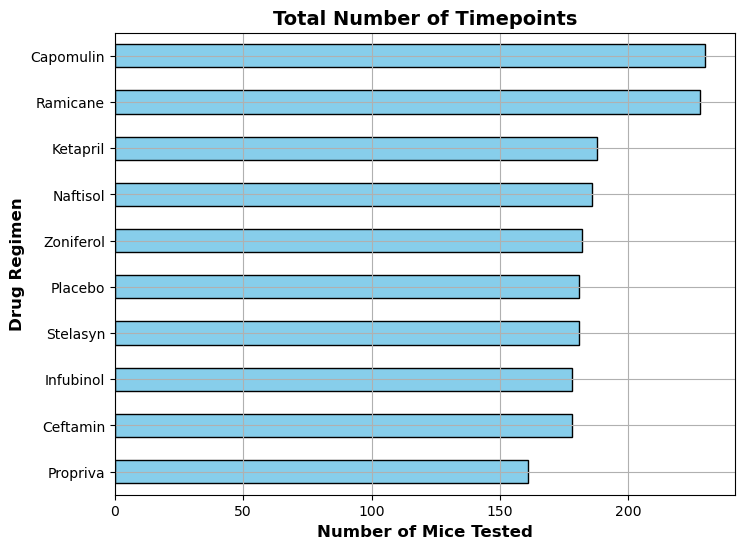

In [14]:
timepoint_plot = df["Drug Regimen"].value_counts()

timepoint_plot.plot(kind = "barh",
                   figsize = (8, 6),
                   color = "skyblue",
                   edgecolor = "black").invert_yaxis()

plt.title("Total Number of Timepoints", fontweight = "bold", fontsize = 14)
plt.ylabel("Drug Regimen", fontweight = "bold", fontsize = 12)
plt.xlabel("Number of Mice Tested", fontweight = "bold", fontsize = 12)
plt.grid()

plt.show()

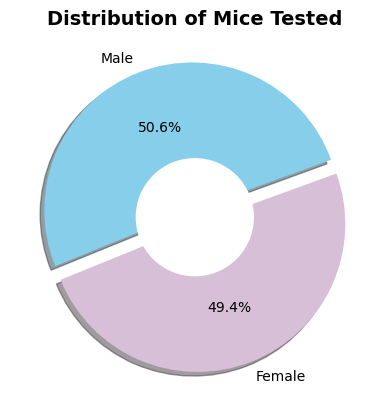

In [15]:
labels = ["Male", "Female"]
values = [50.6, 49.4]
colors = ["skyblue", "thistle"]
explode = [0.05] * 2

plt.pie(values,
       labels = labels,
       colors = colors,
       explode = explode,
       autopct = "%1.1f%%",
       startangle = 20,
       pctdistance = 0.60,
       shadow = True)

circle = plt.Circle((0,0), 0.40, fc = "white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Distribution of Mice Tested", fontweight = "bold", fontsize = 14)

plt.show()

In [24]:
timepoint_last = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
timepoint_last = timepoint_last.reset_index()

treatments_df = timepoint_last.merge(clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
treatments_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,68.0,2
1,a251,45,Infubinol,Female,21,25,65.5,1
2,a262,45,Placebo,Female,17,29,70.7,4
3,a275,45,Ceftamin,Female,20,28,63.0,3
4,a366,30,Stelasyn,Female,16,29,63.4,1


In [112]:
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_voldata = []

for treatment in treatments_list:
    final_vol = treatments_df.loc[treatments_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    tumor_voldata.append(final_vol)
    
    quartiles = final_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.30000000000001 could be outliers.
Values above 87.69999999999999 could be outliers.


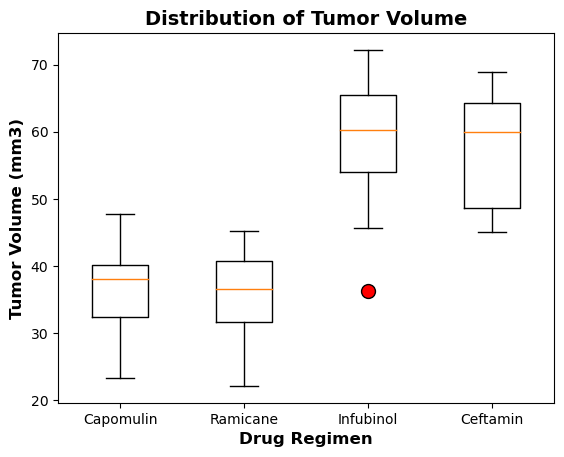

In [104]:
fliers = dict(marker = "o", markerfacecolor = "red", markersize = 10)
plt.boxplot(tumor_voldata, flierprops = fliers)
plt.title("Distribution of Tumor Volume", fontweight = "bold", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontweight = "bold", fontsize = 12)
plt.xlabel("Drug Regimen", fontweight = "bold", fontsize = 12)
plt.xticks([1, 2, 3, 4], treatments_list)

plt.show()

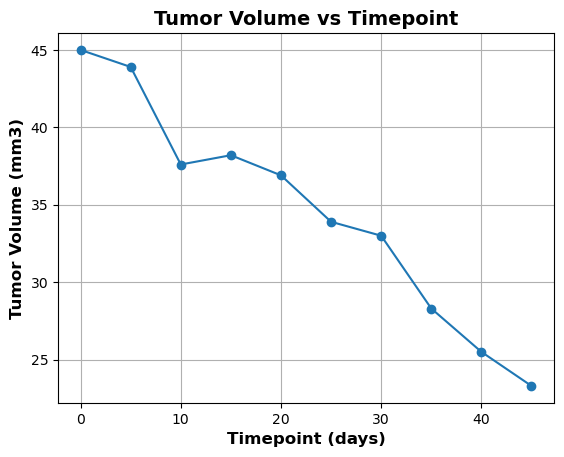

In [99]:
line_plot = df.loc[df["Mouse ID"] == "s185"]

plt.plot(line_plot["Timepoint"], line_plot["Tumor Volume (mm3)"], marker = "o")

plt.title("Tumor Volume vs Timepoint", fontweight = "bold", fontsize = 14)
plt.xlabel("Timepoint (days)", fontweight = "bold", fontsize = 12)
plt.ylabel("Tumor Volume (mm3)", fontweight = "bold", fontsize = 12)
plt.grid()

plt.show()

/var/folders/cp/27d17d3d0fvc2wz4k1m4j2740000gn/T/ipykernel_5079/2060230660.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_cap = scatter_plot.groupby(["Mouse ID"]).mean()


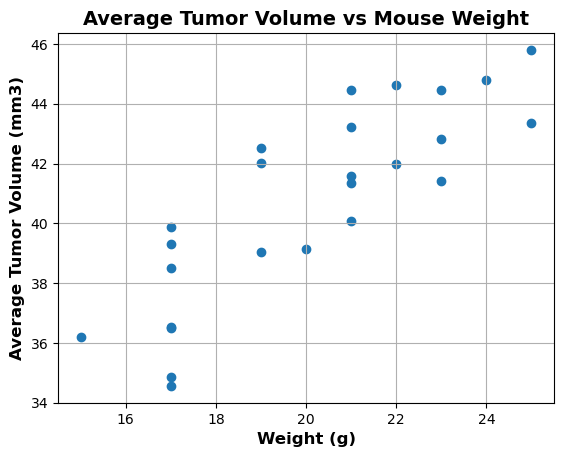

In [100]:
scatter_plot = df.loc[df["Drug Regimen"] == "Capomulin", :]
average_cap = scatter_plot.groupby(["Mouse ID"]).mean()

plt.scatter(average_cap["Weight (g)"], average_cap["Tumor Volume (mm3)"])

plt.title("Average Tumor Volume vs Mouse Weight", fontweight = "bold", fontsize = 14)
plt.xlabel("Weight (g)", fontweight = "bold", fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)", fontweight = "bold", fontsize = 12)
plt.grid()

plt.show()

In [101]:
import scipy.stats as st

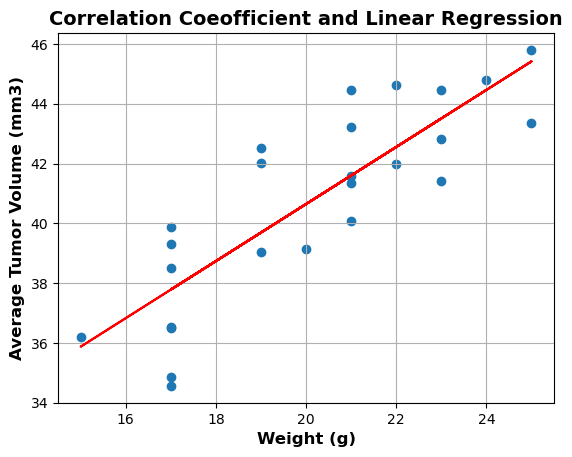

In [102]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_cap["Weight (g)"], average_cap["Tumor Volume (mm3)"])
regress_values = average_cap["Weight (g)"] * slope + intercept

plt.scatter(average_cap["Weight (g)"], average_cap["Tumor Volume (mm3)"])
plt.plot(average_cap["Weight (g)"], regress_values, color = "red")

plt.title("Correlation Coeofficient and Linear Regression", fontweight = "bold", fontsize = 14)
plt.xlabel("Weight (g)", fontweight = "bold", fontsize = 12)
plt.ylabel("Average Tumor Volume (mm3)", fontweight = "bold", fontsize = 12)
plt.grid()

plt.show()